['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'WALLSMATERIAL_MODE',
 'HOUSETYPE_MODE',
 'CNT_FAM_MEMBERS', 'TARGET']


#Import

In [2]:
!pip install chart-studio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.5 MB/s eta 0:00:00


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from datetime import date

In [4]:
# connect google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
application_train = pd.read_csv("/content/gdrive/MyDrive/Kiến tập - Data/2. Dataset/HomeCredit/application_train.csv")
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#Snapshot

In [ ]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
num_observations = len(application_train)

num_variables = len(application_train.columns)

categorical_variables = application_train.select_dtypes(include='object').columns.tolist()
num_categorical_variables = len(categorical_variables)
numeric_variables = application_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_numeric_variables = len(numeric_variables)

print("Số quan sát trong bộ dữ liệu: ", num_observations)
print("Số biến trong bộ dữ liệu: ", num_variables)
print("Biến categorical: ", categorical_variables)
print("Biến numeric: ", numeric_variables)
print("Số biến phân loại trong bộ dữ liệu: ", num_categorical_variables)
print("Số biến số trong bộ dữ liệu: ", num_numeric_variables)

Số quan sát trong bộ dữ liệu:  307511
Số biến trong bộ dữ liệu:  122
Biến categorical:  ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
Biến numeric:  ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CIT

In [ ]:
variables_sled = ['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
             'AMT_INCOME_TOTAL', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
             'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE',
             'FONDKAPREMONT_MODE', 'WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'CNT_FAM_MEMBERS', 'TARGET']

df = pd.DataFrame(application_train, columns=variables_sled)

num_categorical_variables_sled = df.select_dtypes(include='object').shape[1]

num_numeric_variables_sled = df.select_dtypes(include=['int64', 'float64']).shape[1]

print("Số biến phân loại được chọn: ", num_categorical_variables_sled)
print("Số biến số được chọn: ", num_numeric_variables_sled)


Số biến phân loại được chọn:  14
Số biến số được chọn:  6


#Distribution of Target Variable

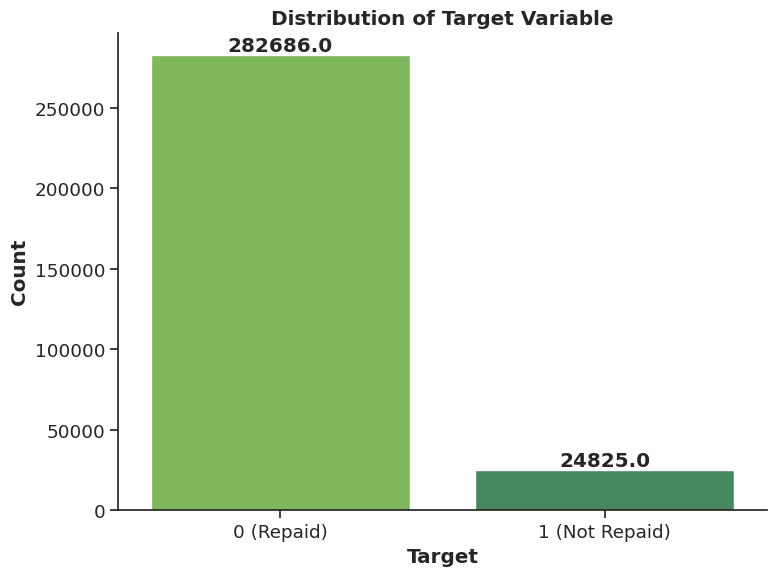

In [ ]:
colors = ["#7BC74D", "#3B945E"]
sns.set(style="ticks", font_scale=1.2)
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='TARGET', data=application_train, palette=colors)
plt.xlabel('Target', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Distribution of Target Variable', fontweight='bold')
plt.xticks(ticks=[0, 1], labels=['0 (Repaid)', '1 (Not Repaid)'])
sns.despine()

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

#Gender Type of Applicants

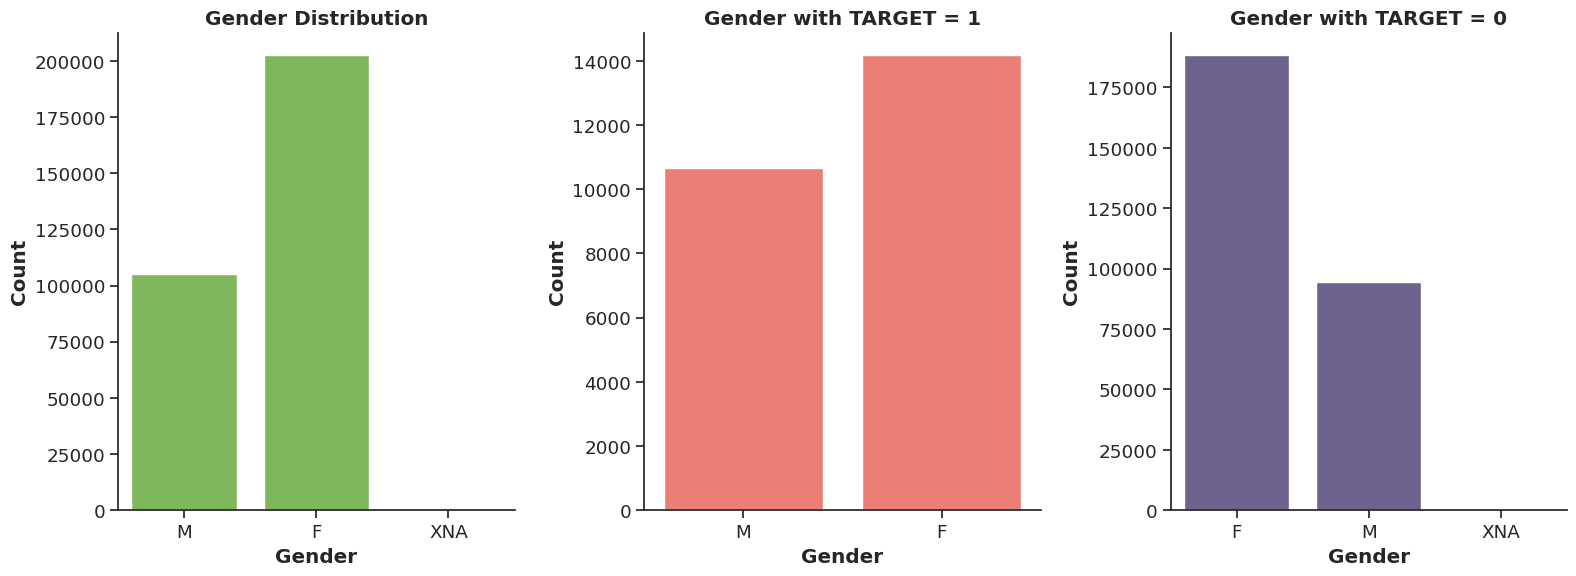

In [ ]:
colors = ["#7BC74D", "#FF6F61", "#6B5B95"]

sns.set(style="ticks", font_scale=1.2)

fig, axes = plt.subplots(1, 3, figsize=(16, 6))

sns.countplot(x='CODE_GENDER', data=application_train, palette=[colors[0]], ax=axes[0])
axes[0].set_xlabel('Gender', fontweight='bold')
axes[0].set_ylabel('Count', fontweight='bold')
axes[0].set_title('Gender Distribution', fontweight='bold')
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)

sns.countplot(x='CODE_GENDER', data=application_train[application_train['TARGET'] == 1], palette=[colors[1]], ax=axes[1])
axes[1].set_xlabel('Gender', fontweight='bold')
axes[1].set_ylabel('Count', fontweight='bold')
axes[1].set_title('Gender with TARGET = 1', fontweight='bold')
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

sns.countplot(x='CODE_GENDER', data=application_train[application_train['TARGET'] == 0], palette=[colors[2]], ax=axes[2])
axes[2].set_xlabel('Gender', fontweight='bold')
axes[2].set_ylabel('Count', fontweight='bold')
axes[2].set_title('Gender with TARGET = 0', fontweight='bold')
axes[2].spines['right'].set_visible(False)
axes[2].spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

#Family Status of Applicants

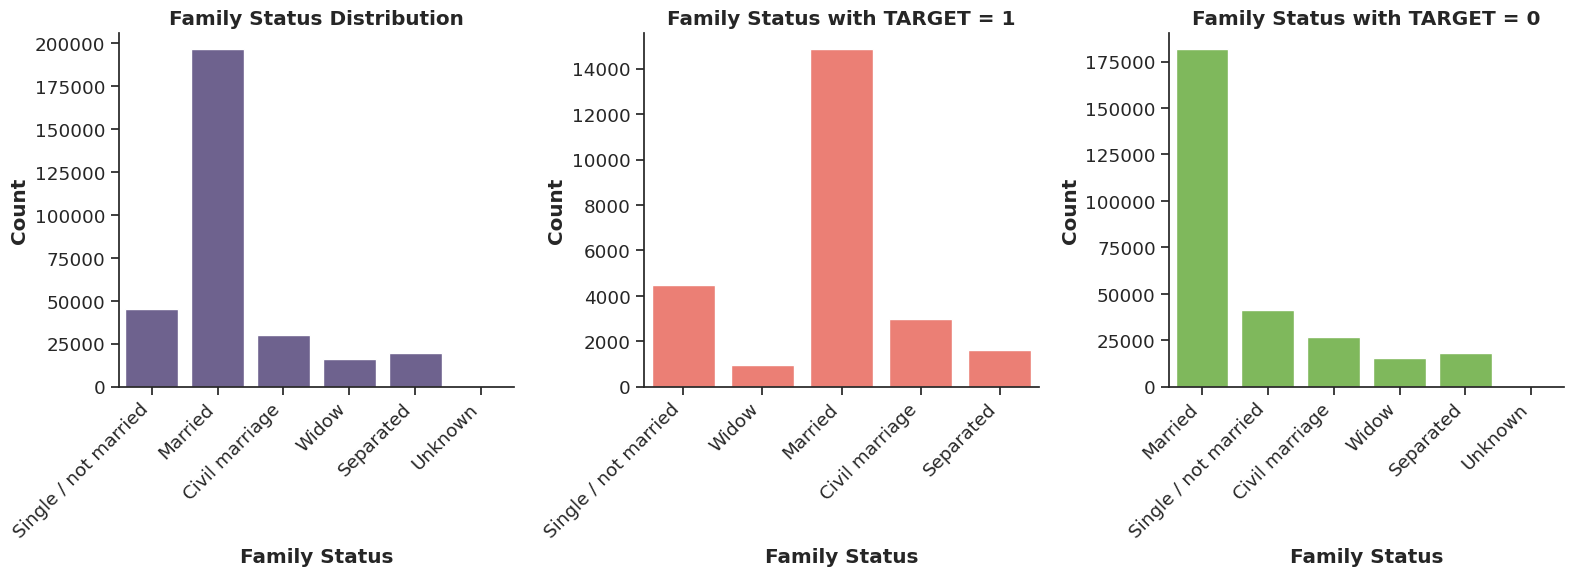

In [ ]:
colors = ["#6B5B95", "#FF6F61", "#7BC74D"]

sns.set(style="ticks", font_scale=1.2)

fig, axes = plt.subplots(1, 3, figsize=(16, 6))

sns.countplot(x='NAME_FAMILY_STATUS', data=application_train, palette=[colors[0]], ax=axes[0])
axes[0].set_xlabel('Family Status', fontweight='bold')
axes[0].set_ylabel('Count', fontweight='bold')
axes[0].set_title('Family Status Distribution', fontweight='bold')
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

sns.countplot(x='NAME_FAMILY_STATUS', data=application_train[application_train['TARGET'] == 1], palette=[colors[1]], ax=axes[1])
axes[1].set_xlabel('Family Status', fontweight='bold')
axes[1].set_ylabel('Count', fontweight='bold')
axes[1].set_title('Family Status with TARGET = 1', fontweight='bold')
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

sns.countplot(x='NAME_FAMILY_STATUS', data=application_train[application_train['TARGET'] == 0], palette=[colors[2]], ax=axes[2])
axes[2].set_xlabel('Family Status', fontweight='bold')
axes[2].set_ylabel('Count', fontweight='bold')
axes[2].set_title('Family Status with TARGET = 0', fontweight='bold')
axes[2].spines['right'].set_visible(False)
axes[2].spines['top'].set_visible(False)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


#Does applicants own Real Estate or Car ?

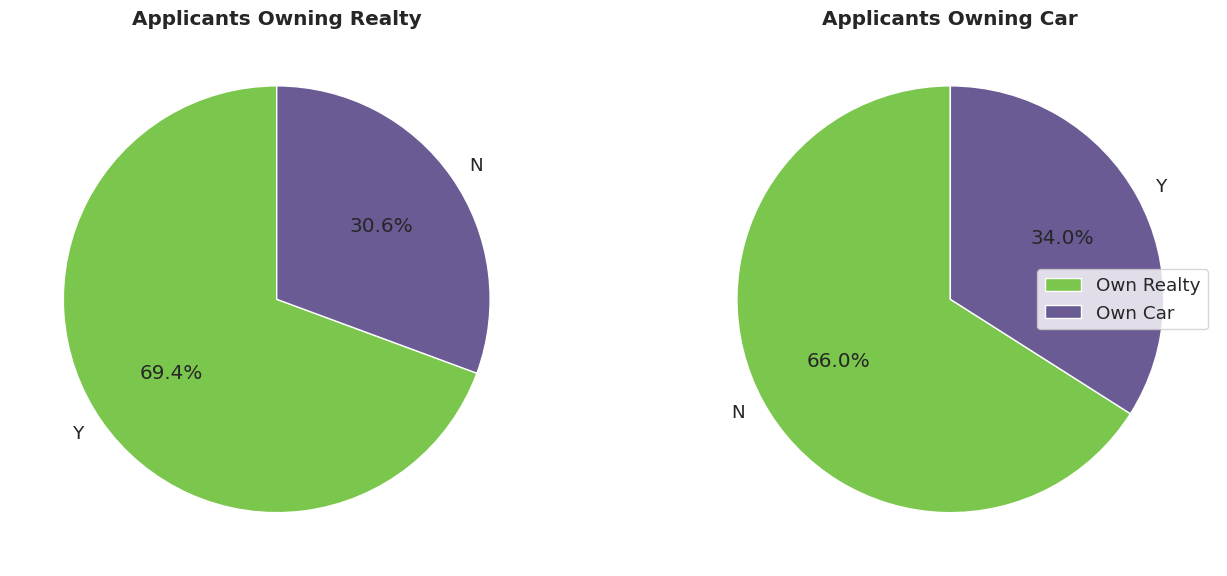

In [ ]:
colors = ["#7BC74D", "#6B5B95"]
labels = ["Own Realty", "Own Car"]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

realty_counts = application_train['FLAG_OWN_REALTY'].value_counts()
axes[0].pie(realty_counts, labels=realty_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Applicants Owning Realty', fontweight='bold')

car_counts = application_train['FLAG_OWN_CAR'].value_counts()
axes[1].pie(car_counts, labels=car_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Applicants Owning Car', fontweight='bold')

axes[1].legend(labels, loc='center right')

plt.tight_layout()
plt.show()


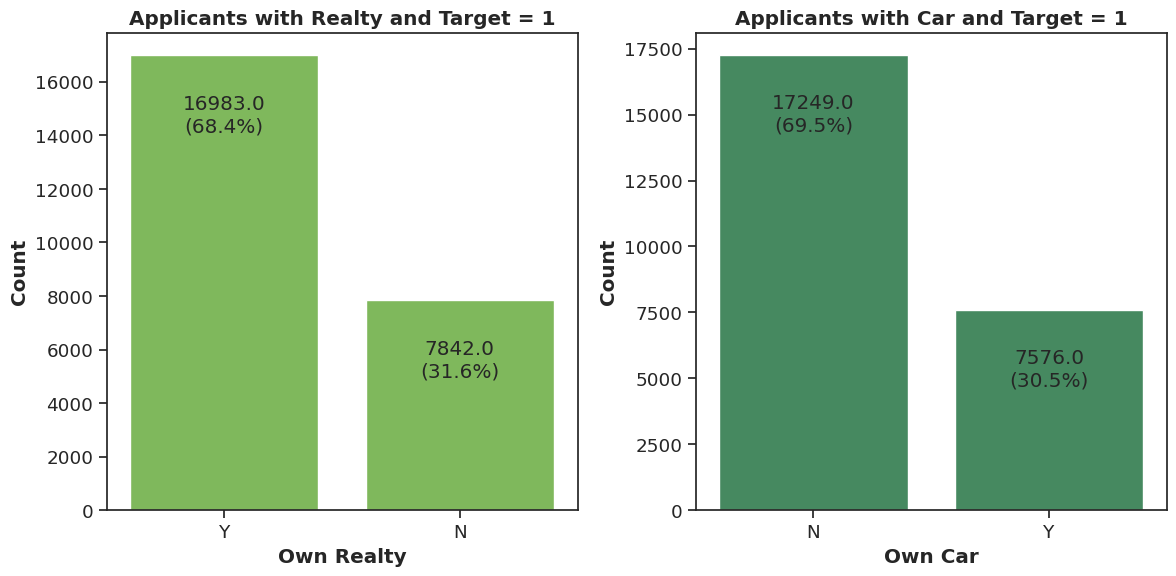

In [ ]:
colors = ["#7BC74D", "#3B945E", "#7BC74D", "#3B945E"]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x='FLAG_OWN_REALTY', data=application_train[application_train['TARGET'] == 1],
              palette=[colors[0]], ax=axes[0])
axes[0].set_xlabel('Own Realty', fontweight='bold')
axes[0].set_ylabel('Count', fontweight='bold')
axes[0].set_title('Applicants with Realty and Target = 1', fontweight='bold')

total = len(application_train[application_train['TARGET'] == 1])
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2, height - 3000, f'{height}\n({height / total * 100:.1f}%)',
                 ha='center', va='bottom')

sns.countplot(x='FLAG_OWN_CAR', data=application_train[application_train['TARGET'] == 1],
              palette=[colors[1]], ax=axes[1])
axes[1].set_xlabel('Own Car', fontweight='bold')
axes[1].set_ylabel('Count', fontweight='bold')
axes[1].set_title('Applicants with Car and Target = 1', fontweight='bold')

total = len(application_train[application_train['TARGET'] == 1])
for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(p.get_x() + p.get_width() / 2, height - 3000, f'{height}\n({height / total * 100:.1f}%)',
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

#Suite Type and Income Type of Applicants

# How does Target Varies with Suite and Income Type of Applicants

#Applicant's Contract Type

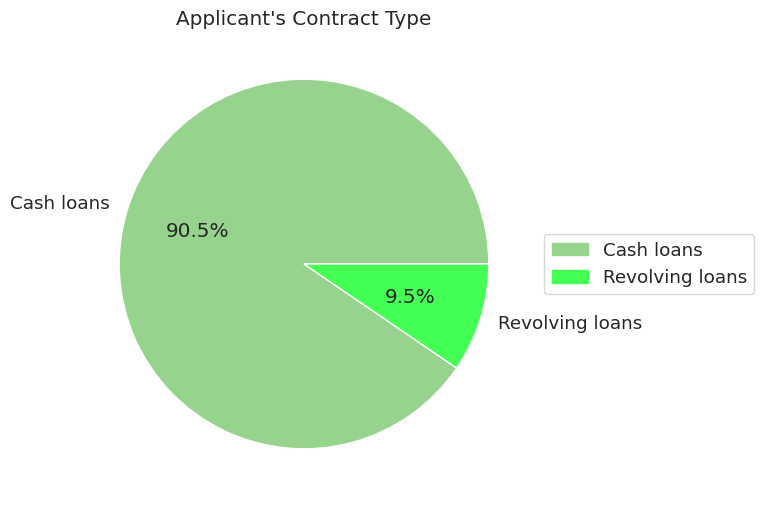

In [ ]:
plt.figure(figsize=(8, 6))
contract_type_counts = application_train['NAME_CONTRACT_TYPE'].value_counts()
colors = ['#96D38C', '#44ff54']
plt.pie(contract_type_counts, labels=contract_type_counts.index, colors=colors, autopct='%1.1f%%')

plt.title("Applicant's Contract Type")

handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
labels = contract_type_counts.index
plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#Education Type and Housing Type

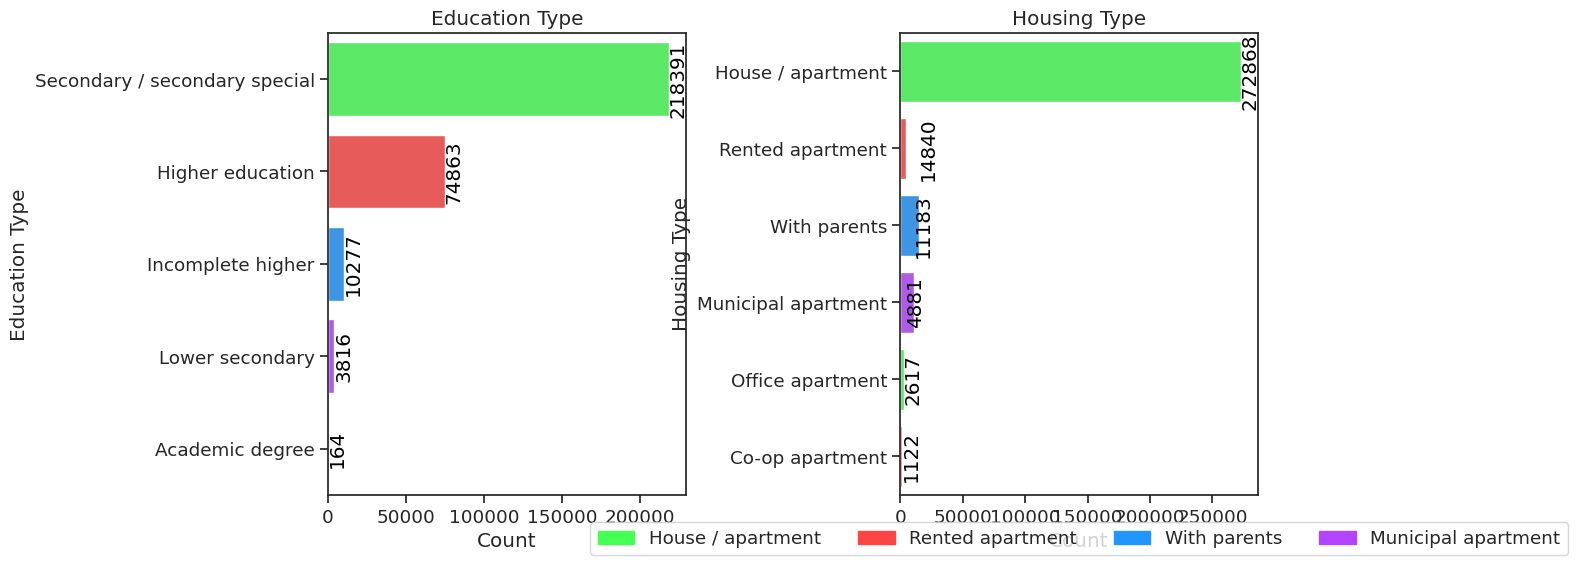

In [ ]:


# Thiết lập màu sắc đậm hơn
colors = ['#44ff54', '#ff4444', '#2296ff', '#b344ff']

# Kích thước biểu đồ và khoảng cách giữa hai biểu đồ
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.6)

# Biểu đồ horizontal chart - Education Type
plt.subplot(1, 2, 1)  # Vẽ biểu đồ đầu tiên
sns.countplot(y='NAME_EDUCATION_TYPE', data=application_train, palette=colors)
plt.title("Education Type")
plt.xlabel('Count')
plt.ylabel('Education Type')

# Giá trị count in trên biểu đồ
for i, v in enumerate(application_train['NAME_EDUCATION_TYPE'].value_counts()):
    plt.text(v + 3, i, str(v), color='black', ha='left', va='center', rotation=90)

# Biểu đồ horizontal chart - Housing Type
plt.subplot(1, 2, 2)  # Vẽ biểu đồ thứ hai
sns.countplot(y='NAME_HOUSING_TYPE', data=application_train, palette=colors)
plt.title("Housing Type")
plt.xlabel('Count')
plt.ylabel('Housing Type')

# Giá trị count in trên biểu đồ
for i, v in enumerate(application_train['NAME_HOUSING_TYPE'].value_counts()):
    plt.text(v + 3, i, str(v), color='black', ha='left', va='center', rotation=90)

# Chú thích màu sắc
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
labels = application_train['NAME_HOUSING_TYPE'].unique()
plt.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=len(labels))

plt.show()


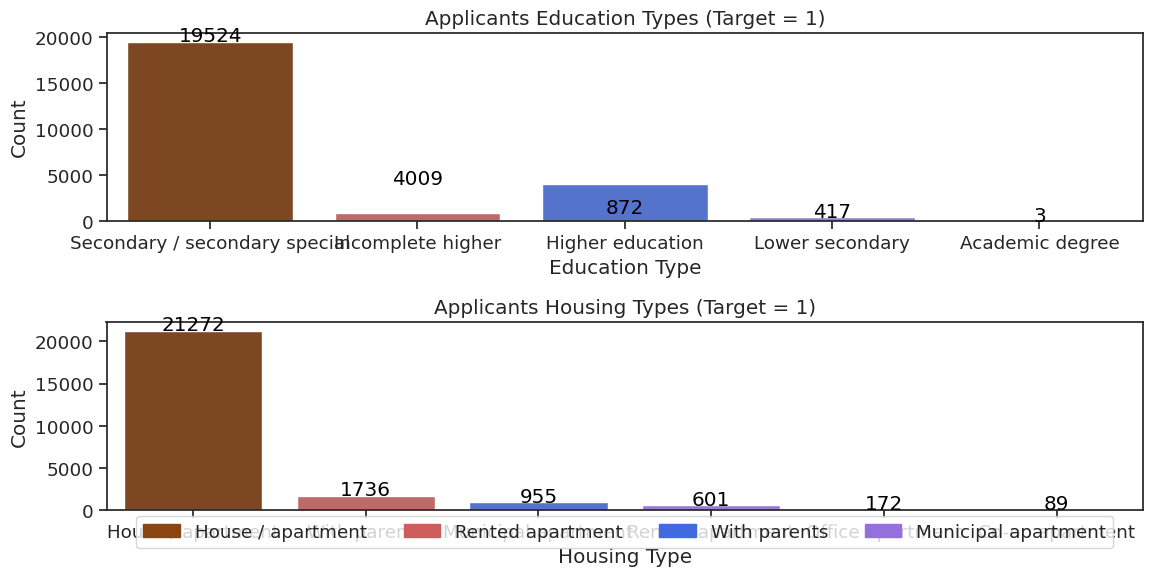

In [ ]:


# Lọc dữ liệu theo target = 1
education_target_1 = application_train[application_train['TARGET'] == 1]['NAME_EDUCATION_TYPE']
housing_target_1 = application_train[application_train['TARGET'] == 1]['NAME_HOUSING_TYPE']

# Thiết lập màu sắc vintage
colors = ['#8B4513', '#CD5C5C', '#4169E1', '#9370DB']

# Kích thước biểu đồ
plt.figure(figsize=(12, 6))

# Biểu đồ cột - Applicants education types with target = 1
plt.subplot(2, 1, 1)  # Vẽ biểu đồ đầu tiên
sns.countplot(x=education_target_1, palette=colors)
plt.title("Applicants Education Types (Target = 1)")
plt.xlabel('Education Type')
plt.ylabel('Count')

# Giá trị count in trên biểu đồ
for i, v in enumerate(education_target_1.value_counts()):
    plt.text(i, v + 3, str(v), color='black', ha='center')

# Biểu đồ cột - Applicants housing types with target = 1
plt.subplot(2, 1, 2)  # Vẽ biểu đồ thứ hai
sns.countplot(x=housing_target_1, palette=colors)
plt.title("Applicants Housing Types (Target = 1)")
plt.xlabel('Housing Type')
plt.ylabel('Count')

# Giá trị count in trên biểu đồ
for i, v in enumerate(housing_target_1.value_counts()):
    plt.text(i, v + 3, str(v), color='black', ha='center')

# Chú thích màu sắc
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
labels = application_train['NAME_HOUSING_TYPE'].unique()
plt.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(labels))

plt.tight_layout()
plt.show()


#Which Organization and Occupation Type applies for loan and which repays

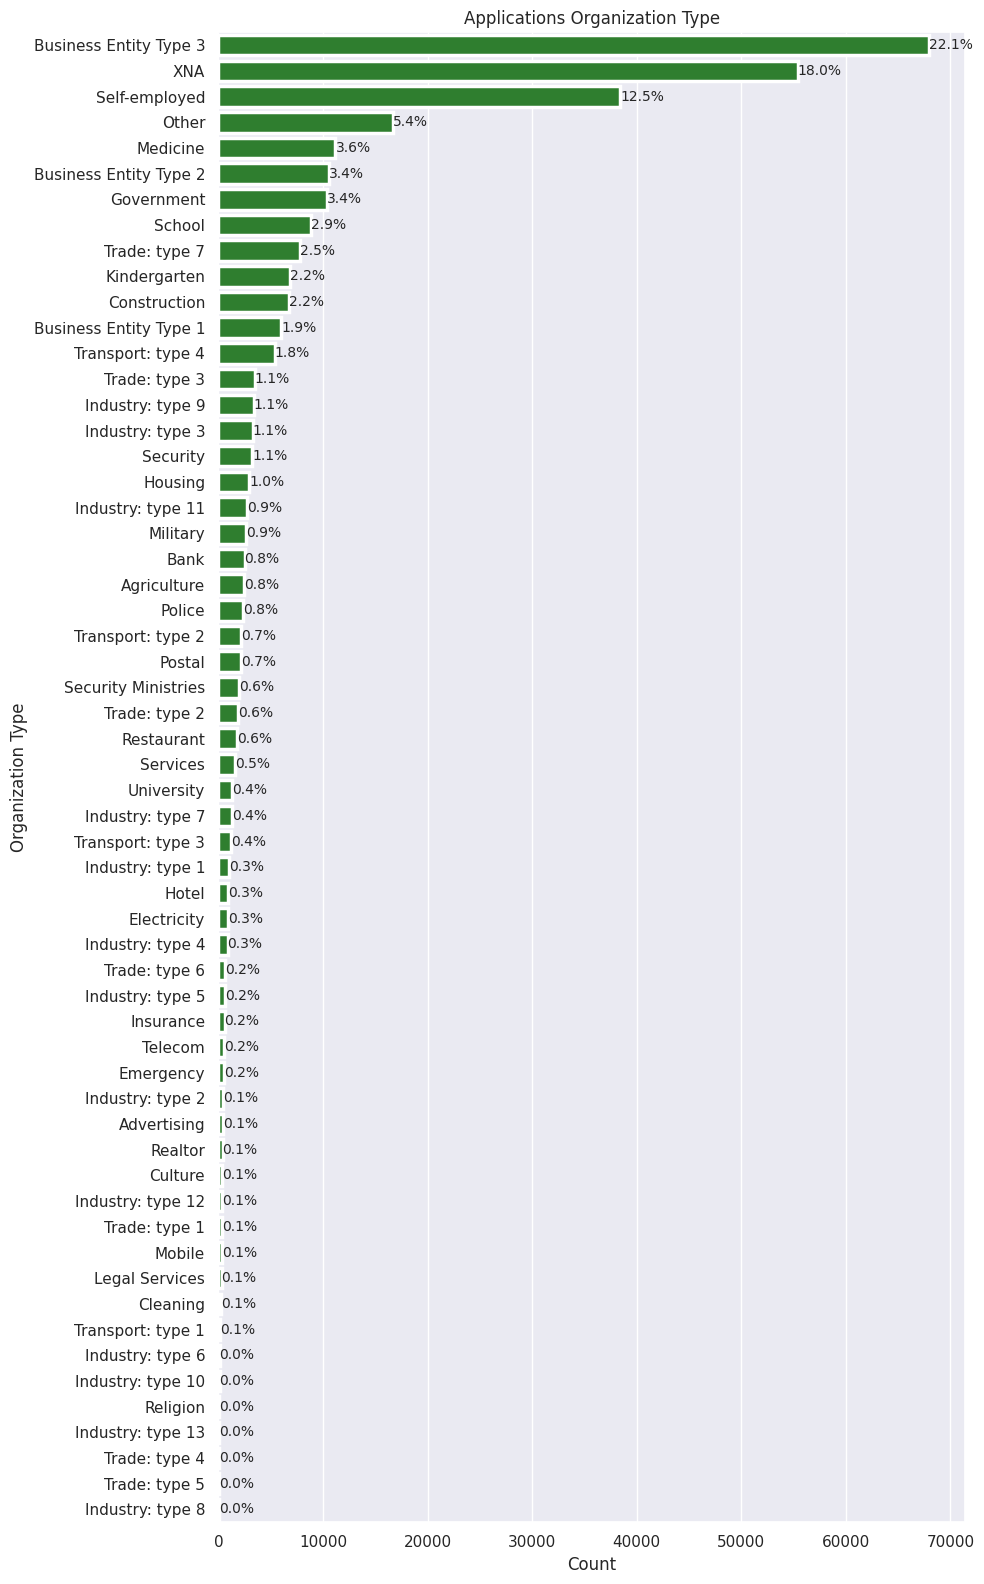

In [ ]:
organization_type = 'ORGANIZATION_TYPE'
occupation_type = 'OCCUPATION_TYPE'
data = application_train

color = '#228B22'

plt.figure(figsize=(10, 16))

sns.set(font_scale=1)  # Adjust the font size here
ax = sns.countplot(y=organization_type, data=data, color=color, orient='h', order=data[organization_type].value_counts().index, linewidth=2.5)
plt.title("Applications Organization Type")
plt.xlabel('Count')
plt.ylabel('Organization Type')

total = len(data[organization_type])  # Total number of data points

# Add percentage annotations to the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), fontsize=10, va='center')

plt.tight_layout()
plt.show()


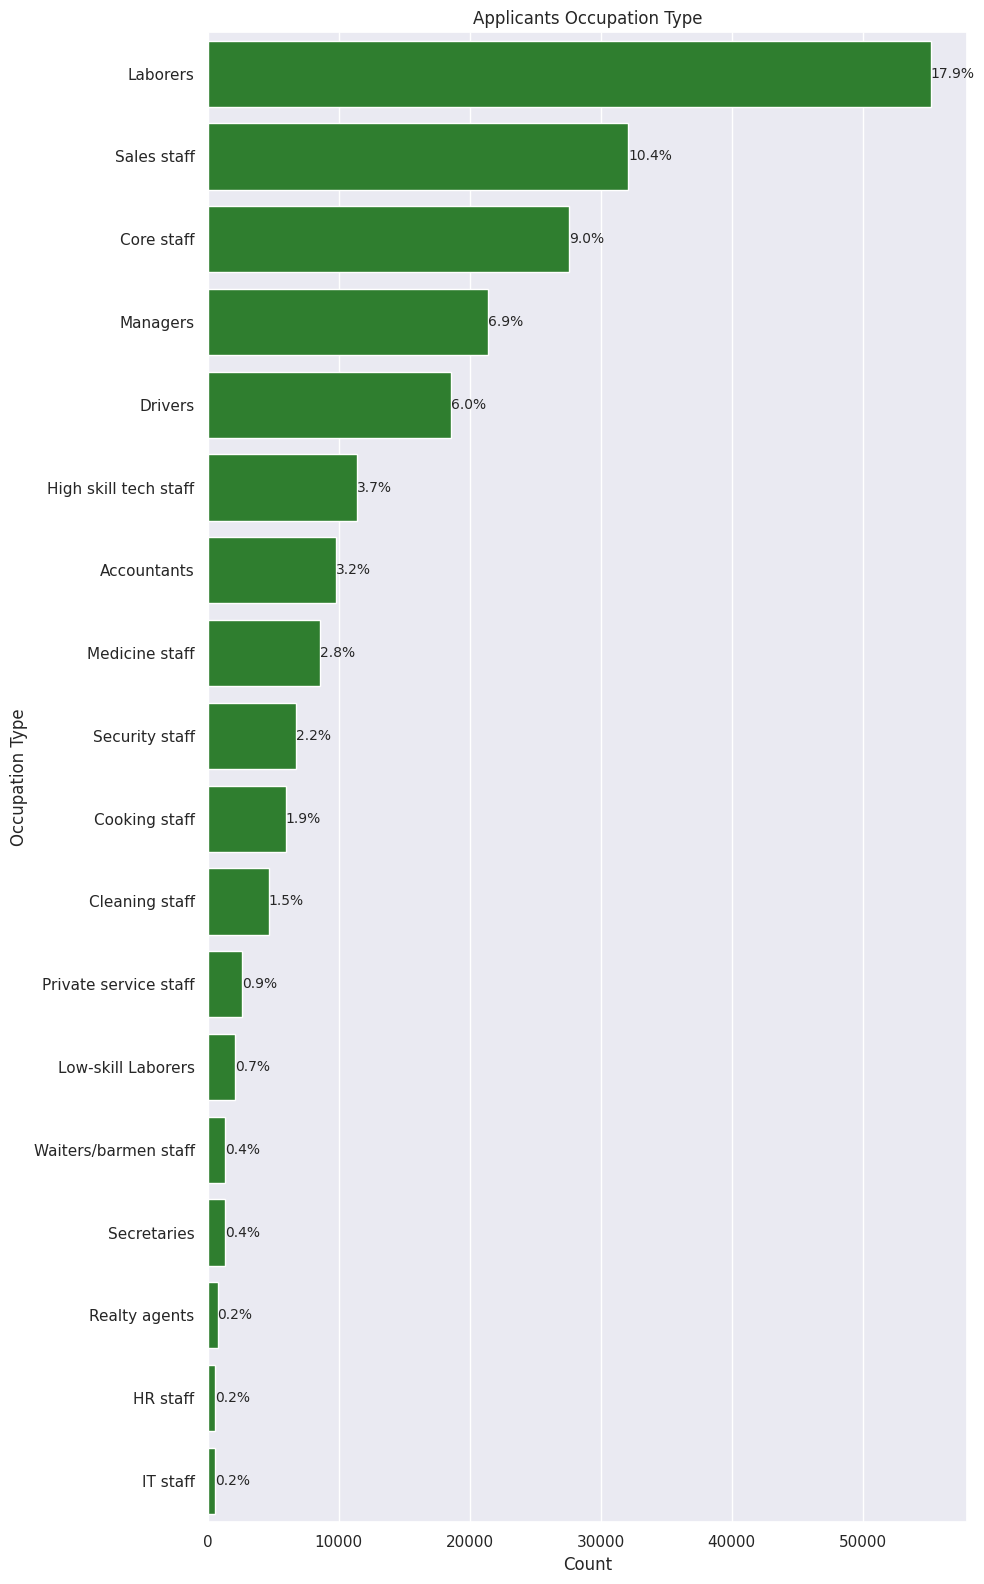

In [ ]:
occupation_type = 'OCCUPATION_TYPE'
data = application_train

color = '#228B22'

plt.figure(figsize=(10, 16))

sns.set(font_scale=1)  # Adjust the font size here
ax = sns.countplot(y=occupation_type, data=data, color=color, orient='h', order=data[occupation_type].value_counts().index)
plt.title("Applicants Occupation Type")
plt.xlabel('Count')
plt.ylabel('Occupation Type')

total = len(data[occupation_type])  # Total number of data points

# Add percentage annotations to the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), fontsize=10, va='center')

plt.tight_layout()
plt.show()


#Target Variable with respect to Organization and Occupation Type

#Walls Material, Foundation, and House Type

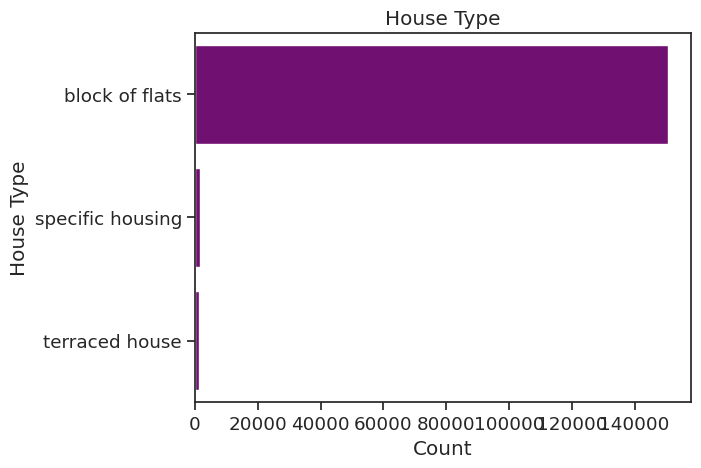

In [ ]:
house_type = 'HOUSETYPE_MODE'
data = application_train

color = '#800080'  # Tím

house_type_order = data[house_type].value_counts().sort_values(ascending=False).index

sns.countplot(y=house_type, data=data, color=color, order=house_type_order, orient='h')
plt.title("House Type")
plt.xlabel('Count')
plt.ylabel('House Type')

plt.show()


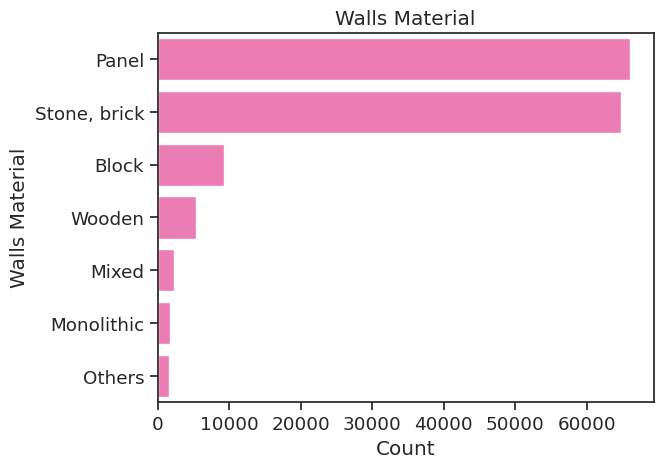

In [ ]:
walls_material = 'WALLSMATERIAL_MODE'
data = application_train

color = '#FF69B4'  # Hồng

walls_material_order = data[walls_material].value_counts().sort_values(ascending=False).index

sns.countplot(y=walls_material, data=data, color=color, order=walls_material_order, orient='h')
plt.title("Walls Material")
plt.xlabel('Count')
plt.ylabel('Walls Material')

plt.show()


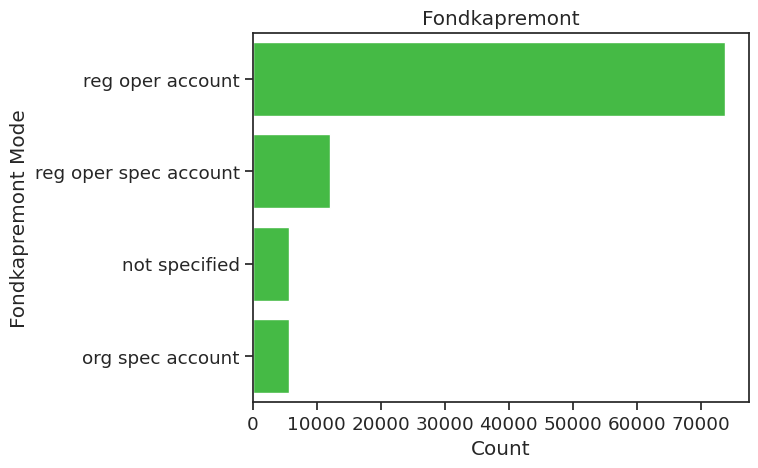

In [ ]:
fondkapremont_mode = 'FONDKAPREMONT_MODE'
data = application_train

color = 'limegreen'  # Xanh lá

order = data[fondkapremont_mode].value_counts().sort_values(ascending=False).index

sns.countplot(y=fondkapremont_mode, data=data, color=color, order=order)
plt.title("Fondkapremont")
plt.xlabel('Count')
plt.ylabel('Fondkapremont Mode')

plt.show()


#Target Variable with respect to Walls Material, Fondkappremont, House Type

#Number members of applicants family (target = 1)


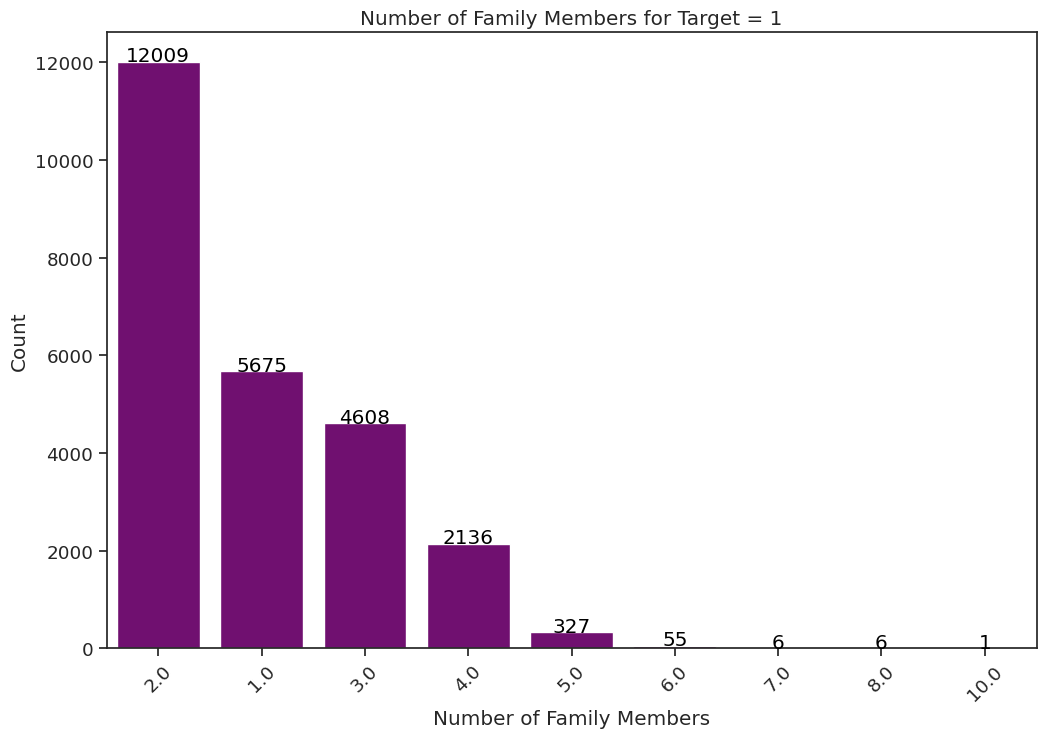

In [ ]:

fam_members = 'CNT_FAM_MEMBERS'
target = 'TARGET'
data = application_train

# Lọc dữ liệu chỉ với target = 1
filtered_data = data[data[target] == 1]

# Đếm số lượng cho mỗi nhóm và sắp xếp giảm dần
group_counts = filtered_data[fam_members].value_counts().sort_values(ascending=False)

# Giới hạn số lượng nhóm để hiển thị trên biểu đồ
top_n = 10
group_counts = group_counts[:top_n]

# Tạo biểu đồ bar chart
plt.figure(figsize=(12, 8))  # Tăng kích thước biểu đồ

# Sắp xếp giá trị theo thứ tự giảm dần
order = group_counts.sort_values(ascending=False).index

# Vẽ biểu đồ bar chart
sns.barplot(x=group_counts.index, y=group_counts.values, color='#800080', order=order)

# Hiển thị giá trị trên biểu đồ
for i, v in enumerate(group_counts.values):
    plt.text(i, v + 10, str(v), color='black', ha='center')

# Đặt tiêu đề và nhãn cho trục
plt.title("Number of Family Members for Target = 1")
plt.xlabel('Number of Family Members')
plt.ylabel('Count')

plt.xticks(rotation=45)  # Xoay nhãn trục x để tránh chồng chéo

plt.show()


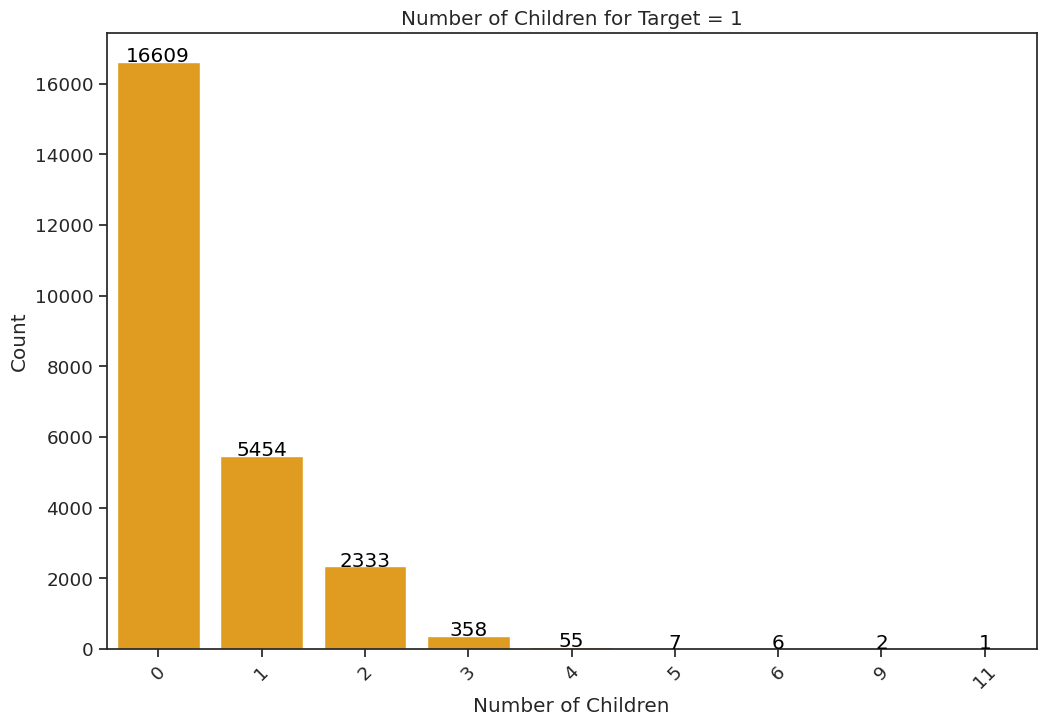

In [ ]:
children_count = 'CNT_CHILDREN'
target = 'TARGET'
data = application_train

filtered_data = data[data[target] == 1]

group_counts = filtered_data[children_count].value_counts().sort_values(ascending=False)

top_n = 10
group_counts = group_counts[:top_n]

plt.figure(figsize=(12, 8))

order = group_counts.sort_values(ascending=False).index

sns.barplot(x=group_counts.index, y=group_counts.values, color='#FFA500', order=order)

for i, v in enumerate(group_counts.values):
    plt.text(i, v + 10, str(v), color='black', ha='center')

plt.title("Number of Children for Target = 1")
plt.xlabel('Number of Children')
plt.ylabel('Count')

plt.xticks(rotation=45)  # Xoay nhãn trục x để tránh chồng chéo

plt.show()


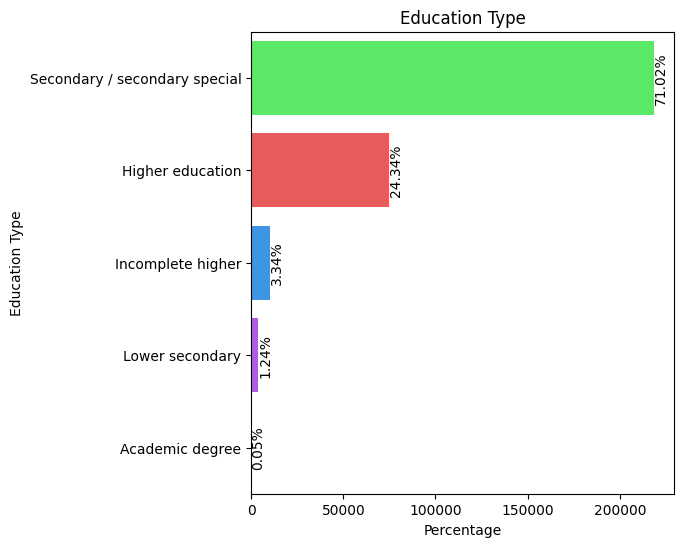

In [ ]:
# Thiết lập màu sắc đậm hơn
colors = ['#44ff54', '#ff4444', '#2296ff', '#b344ff']

# Kích thước biểu đồ và khoảng cách giữa hai biểu đồ
plt.figure(figsize=(12, 6))
# Biểu đồ horizontal chart - Education Type
plt.subplot(1, 2, 1)  # Vẽ biểu đồ đầu tiên
sns.countplot(y='NAME_EDUCATION_TYPE', data=application_train, palette=colors)
plt.title("Education Type")
plt.xlabel('Percentage')
plt.ylabel('Education Type')

# Giá trị count in trên biểu đồ
total = application_train['NAME_EDUCATION_TYPE'].value_counts().sum()  # Calculate the total count

for i, v in enumerate(application_train['NAME_EDUCATION_TYPE'].value_counts()):
    percentage = v / total * 100  # Calculate the percentage
    plt.text(v + 3, i, f"{percentage:.2f}%", color='black', ha='left', va='center', rotation=90)



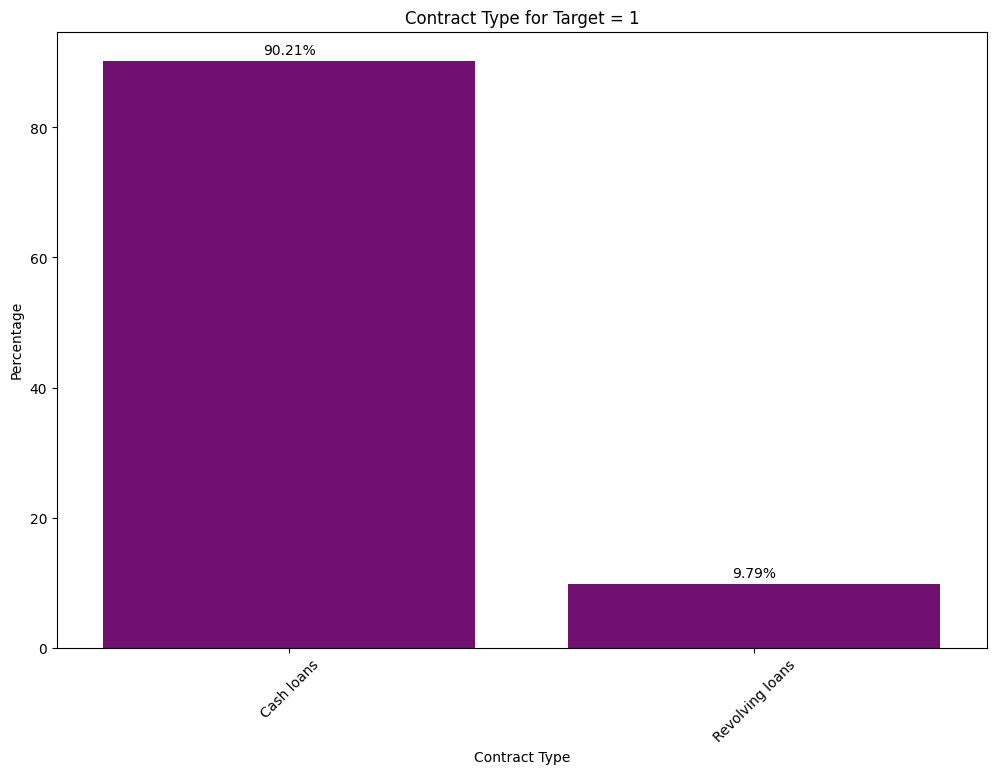

In [ ]:
fam_members = 'NAME_CONTRACT_TYPE'
target = 'TARGET'
data = application_train

# Filter data for target = 1
filtered_data = data[data[target] == 0]

# Calculate the percentage for each group and sort in descending order
group_counts = filtered_data[fam_members].value_counts(normalize=True).sort_values(ascending=False) * 100

# Limit the number of groups to display on the chart
top_n = 10
group_counts = group_counts[:top_n]

# Create a bar chart
plt.figure(figsize=(12, 8))  # Increase the size of the chart

# Sort the values in descending order
order = group_counts.sort_values(ascending=False).index

# Draw the bar chart
sns.barplot(x=group_counts.index, y=group_counts.values, color='#800080', order=order)

# Display the values on the chart
for i, v in enumerate(group_counts.values):
    plt.text(i, v + 1, f"{v:.2f}%", color='black', ha='center')

# Set the title and labels for the axes
plt.title("Contract Type for Target = 1")
plt.xlabel('Contract Type')
plt.ylabel('Percentage')

plt.xticks(rotation=45)  # Rotate the x-axis labels to avoid overlap

plt.show()


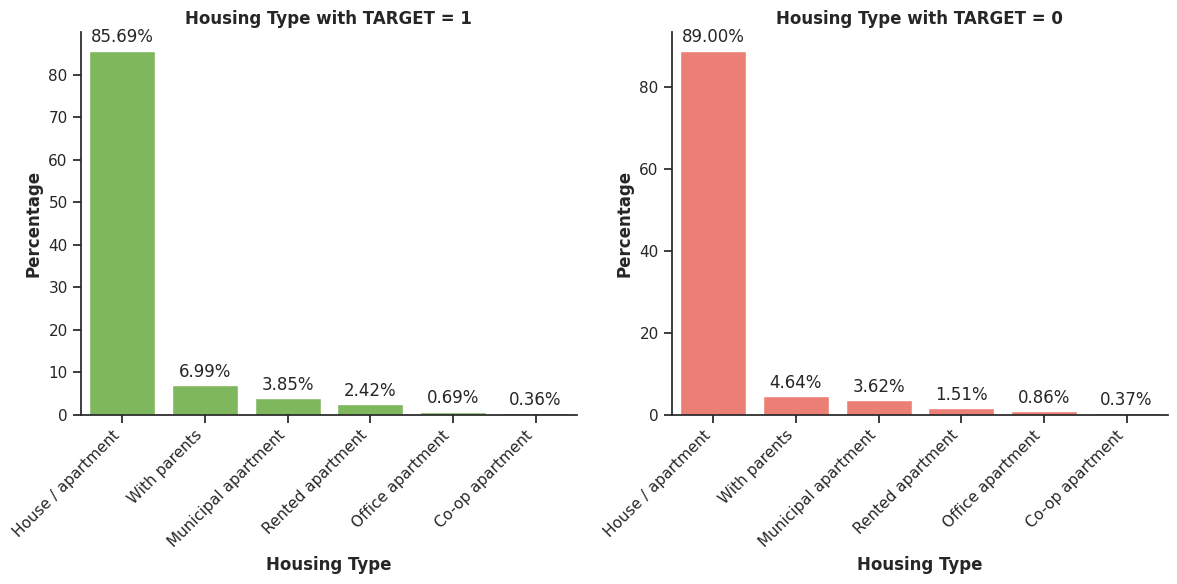

In [ ]:
colors = ["#FF6F61", "#7BC74D"]

sns.set(style="ticks", font_scale=1.0)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Calculate percentage for TARGET = 1
total_1 = len(application_train[application_train['TARGET'] == 1])
data_1 = application_train[application_train['TARGET'] == 1]
percentage_1 = data_1['NAME_HOUSING_TYPE'].value_counts(normalize=True) * 100

sns.barplot(x=percentage_1.index, y=percentage_1.values, palette=[colors[1]], ax=axes[0])
axes[0].set_xlabel('Housing Type', fontweight='bold')
axes[0].set_ylabel('Percentage', fontweight='bold')
axes[0].set_title('Housing Type with TARGET = 1', fontweight='bold')
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Calculate percentage for TARGET = 0
total_0 = len(application_train[application_train['TARGET'] == 0])
data_0 = application_train[application_train['TARGET'] == 0]
percentage_0 = data_0['NAME_HOUSING_TYPE'].value_counts(normalize=True) * 100

sns.barplot(x=percentage_0.index, y=percentage_0.values, palette=[colors[0]], ax=axes[1])
axes[1].set_xlabel('Housing Type', fontweight='bold')
axes[1].set_ylabel('Percentage', fontweight='bold')
axes[1].set_title('Housing Type with TARGET = 0', fontweight='bold')
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

# Display percentage values on the bar charts
for ax in axes:
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


#Distribution of Amount DAYS_BIRTH

<ipython-input-11-ee3510803f43>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(application_train["DAYS_BIRTH"], color='green')


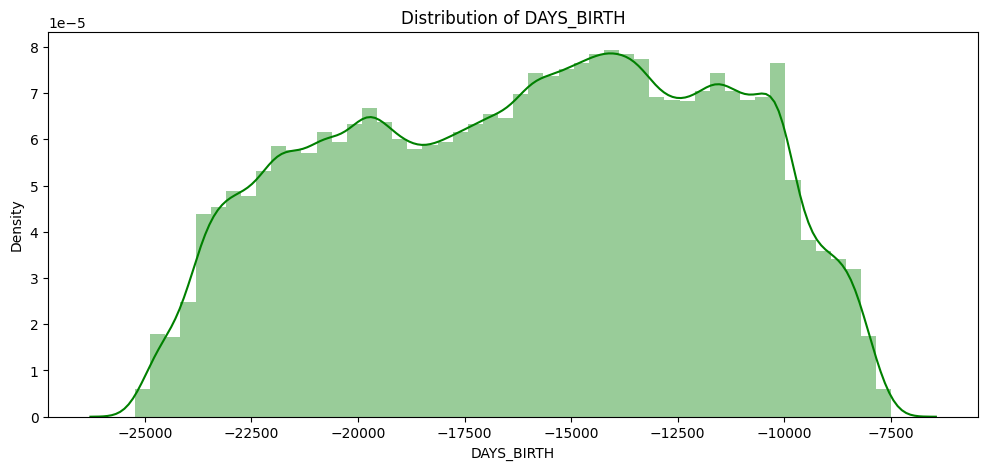

In [11]:
plt.figure(figsize=(12,5))
plt.title("Distribution of DAYS_BIRTH")
ax = sns.distplot(application_train["DAYS_BIRTH"], color='green')
plt.show()

<ipython-input-22-7ebc2e93b874>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(application_train["DAYS_BIRTH"], color='green')


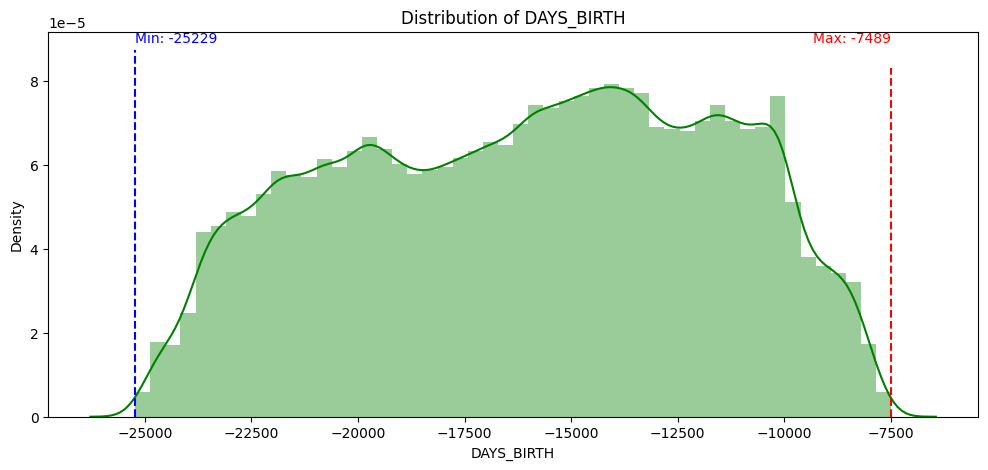

In [22]:
plt.figure(figsize=(12, 5))
plt.title("Distribution of DAYS_BIRTH")

# Vẽ biểu đồ phân phối
ax = sns.distplot(application_train["DAYS_BIRTH"], color='green')

# Tìm chỉ số của cột cao nhất và cột nhất
max_value = np.max(application_train["DAYS_BIRTH"])
min_value = np.min(application_train["DAYS_BIRTH"])

# Vẽ đường dọc đại diện cho cột cao nhất và cột nhất
ax.vlines(max_value, 0, ax.get_ylim()[1], color='red', linestyle='dashed')
ax.vlines(min_value, 0, ax.get_ylim()[1], color='blue', linestyle='dashed')

# Hiển thị chỉ số bên cạnh các đường dọc
ax.text(max_value, ax.get_ylim()[1], f"Max: {max_value}", ha='right', va='top', color='red')
ax.text(min_value, ax.get_ylim()[1], f"Min: {min_value}", ha='left', va='top', color='blue')

plt.show()

<ipython-input-30-f6358756f091>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(application_train["DAYS_BIRTH"], color='green')


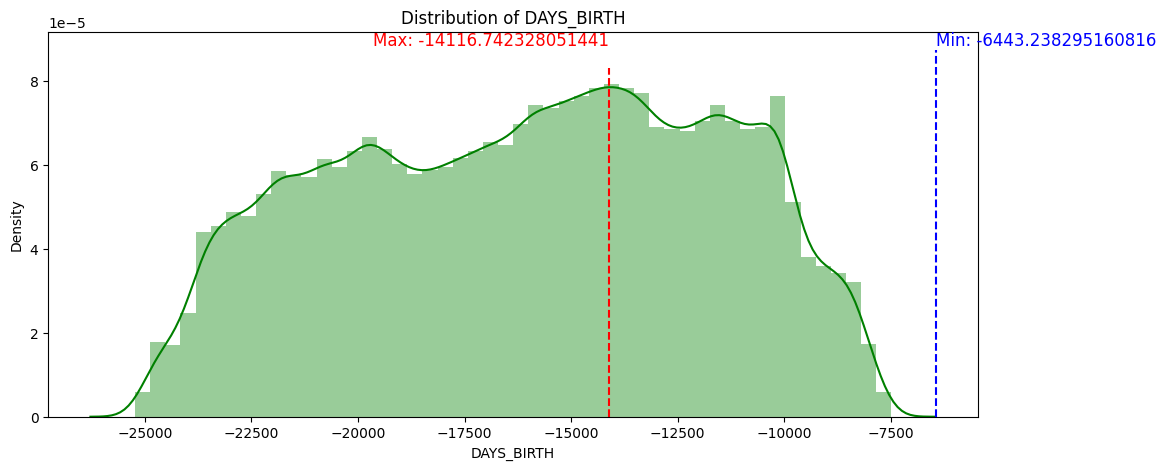

In [30]:
plt.figure(figsize=(12, 5))
plt.title("Distribution of DAYS_BIRTH")

# Vẽ biểu đồ phân phối
ax = sns.distplot(application_train["DAYS_BIRTH"], color='green')

# Tìm chỉ số của đường trend
density_values = ax.get_lines()[0].get_data()
density_x = density_values[0]
density_y = density_values[1]
max_index = np.argmax(density_y)
min_index = np.argmin(density_y)
max_value = density_x[max_index]
min_value = density_x[min_index]

# Vẽ đường dọc đại diện cho cột cao nhất và cột nhất
ax.vlines(max_value, 0, ax.get_ylim()[1], color='red', linestyle='dashed')
ax.vlines(min_value, 0, ax.get_ylim()[1], color='blue', linestyle='dashed')

# Hiển thị chỉ số bên cạnh các đường dọc
ax.text(max_value, ax.get_ylim()[1], f"Max: {max_value}", ha='right', va='top', color='red', fontsize=12)
ax.text(min_value, ax.get_ylim()[1], f"Min: {min_value}", ha='left', va='top', color='blue', fontsize=12)

plt.show()